In [145]:
# Add Matplitlib inline magic command
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

In [2]:
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [6]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
# Get the unique values of the type of city
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [10]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
1620,Reynoldsfurt,2019-02-14 11:25:10,39.40,9070692324754,67,Urban
1621,Christopherfurt,2019-03-13 01:47:52,32.05,2788817929605,41,Urban
1622,Raymondhaven,2019-03-20 02:20:34,38.53,8658255136559,11,Urban
1623,Port Johnbury,2019-03-26 07:22:45,7.63,8089282605778,3,Urban


In [15]:
# Create the subsuburban and rural city Dataframes
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
# suburban_cities_df
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
# rural_cities_df

In [16]:
# Get the number of rides for urban cities
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [17]:
# Get the number of rides for suburban cities
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [18]:
# Get the number of rides for rural cities
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [19]:
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# urban_avg_fare.head()

# Get average fare for each city in the suburban cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# suburban_avg_fare.head()

# Get average fare for each city in the rural cities.
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
# rural_avg_fare.head()

In [21]:
# Get average driver_count for each city in the urban cities.
urban_avg_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# urban_avg_driver_count.head()

# Get average driver_count for each city in the suburban cities.
suburban_avg_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# suburban_avg_driver_count.head()

# Get average driver_count for each city in the rural cities.
rural_avg_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
# rural_avg_driver_count.head()

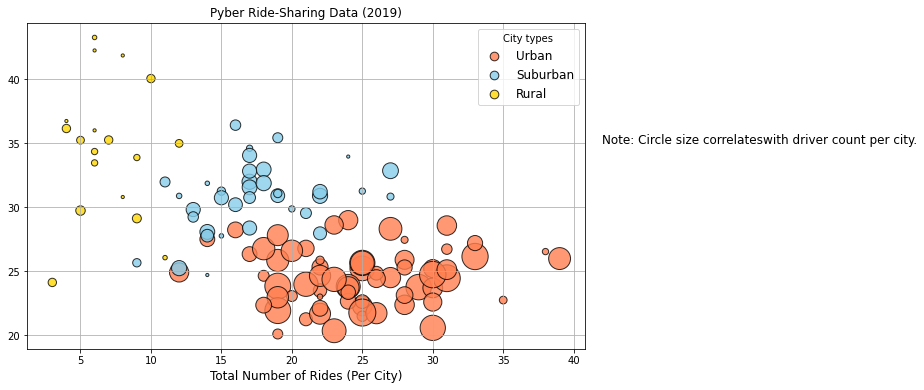

In [22]:
# Build the scatter plots for urban cities
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10*urban_avg_driver_count, c="coral",
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Urban"
           )
# Build the scatter plots for suburban cities
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10*suburban_avg_driver_count, c="skyblue",
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Suburban"
           )
# Build the scatter plots for rural cities
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10*rural_avg_driver_count, c="gold",
            edgecolor="black", linewidths=1, 
            alpha=0.8, label="Rural"
           )
# Incorporate the other graph properties
plt.title("Pyber Ride-Sharing Data (2019)")
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc="best", title="City types"
                 )
lgnd.legendHandles[0]._sizes=[75]
lgnd.legendHandles[1]._sizes=[75]
lgnd.legendHandles[2]._sizes=[75]
lgnd.get_title().set_fontsize

plt.text(42,35,
         "Note: Circle size correlateswith driver count per city.",
         fontsize="12")

# Save the figure
plt.savefig("analysis/fig1.png")

In [29]:
# Get summary statistics
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [30]:
# Get summary statistics
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.971015e+12,13.712000
std,10.677508,2.912410e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.364253e+12,5.000000
50%,30.750000,5.053221e+12,16.000000
75%,39.830000,7.551674e+12,21.000000
max,49.960000,9.917744e+12,25.000000


In [31]:
# Get summary statistics
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.647746e+12,4.296000
std,14.558046,2.887834e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.275364e+12,1.000000
50%,37.050000,4.023962e+12,4.000000
75%,47.070000,7.118047e+12,7.000000
max,58.550000,9.990581e+12,9.000000


In [32]:
# Get summary statistics
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [33]:
# Get summary statistics
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [34]:
# Get summary statistics
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [35]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [36]:
# Calculate the median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [37]:
# Calculate the mode of the ride count for each city type
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)

(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts fo rurban trips is {mean_urban_ride_count:.2f}.')

The mean for the ride counts fo rurban trips is 24.62.


In [41]:
# Calculate the measures of central tendency for the ride count for the urban cities.
median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts fo rurban trips is {median_urban_ride_count:.2f}.')

The median for the ride counts fo rurban trips is 24.00.


In [43]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts fo rurban trips is {mode_urban_ride_count}.')

The mode for the ride counts fo rurban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [44]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts fo rsuburban trips is {mode_suburban_ride_count}.')

The mode for the ride counts fo rsuburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [45]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts fo rrural trips is {mode_rural_ride_count}.')

The mode for the ride counts fo rrural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [46]:
# Get the fares for the urban cities
urban_fares=urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [53]:
# Get the fares for the suburban cities
suburban_fares=suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [54]:
# Get the fares for the rural cities
rural_fares=rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [47]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares=np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}')

The mean fare price for urban trips is $24.53


In [55]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares=np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}')

The mean fare price for suburban trips is $30.97


In [56]:
# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares=np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}')

The mean fare price for rural trips is $34.62


In [49]:
# Calculate the measures of central tendency for the average fare for the urban cities.
median_urban_fares=np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}')

The median fare price for urban trips is $24.64


In [51]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mode_urban_fares=sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}')

The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5]))


In [57]:
# Get the driver count data from the urban cities
urban_drivers=urban_cities_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [58]:
# Get the driver count data from the suburban cities
suburban_drivers=suburban_cities_df["driver_count"]
suburban_drivers

1625    11
1626    20
1627    22
1628    19
1629    12
        ..
2245    12
2246     4
2247    23
2248     5
2249    17
Name: driver_count, Length: 625, dtype: int64

In [59]:
# Get the driver count data from the rural cities
rural_drivers=rural_cities_df["driver_count"]
rural_drivers

2250    9
2251    8
2252    6
2253    2
2254    2
       ..
2370    6
2371    2
2372    1
2373    4
2374    1
Name: driver_count, Length: 125, dtype: int64

In [66]:
urban_drivers_mean=np.mean(urban_drivers)
print (f'{urban_drivers_mean:.2f}')

36.68


In [69]:
urban_drivers_median=np.median(urban_drivers)
print (f'{urban_drivers_median:.2f}')

37.00


In [70]:
urban_drivers_mode=sts.mode(urban_drivers)
print (f'{urban_drivers_mode}')

ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [78]:
suburban_drivers_mean=np.mean(suburban_drivers)
print (f'{suburban_drivers_mean:.2f}')

13.71


In [72]:
suburban_drivers_median=np.median(suburban_drivers)
print (f'{suburban_drivers_median:.2f}')

16.00


In [73]:
suburban_drivers_mode=sts.mode(suburban_drivers)
print (f'{suburban_drivers_mode}')

ModeResult(mode=array([20], dtype=int64), count=array([79]))


In [68]:
rural_drivers_mean=np.mean(rural_drivers)
print (f'{rural_drivers_mean:.2f}')

4.30


In [74]:
rural_drivers_median=np.median(rural_drivers)
print (f'{rural_drivers_median:.2f}')

4.00


In [75]:
rural_drivers_mode=sts.mode(rural_drivers)
print (f'{rural_drivers_mode}')

ModeResult(mode=array([1], dtype=int64), count=array([32]))


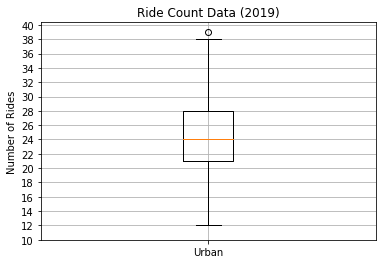

In [79]:
# Create a box and whisker plot for the urban cities ride count.
x_labels=["Urban"]
fig, ax=plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41,step=2.0))
ax.grid()
plt.show()

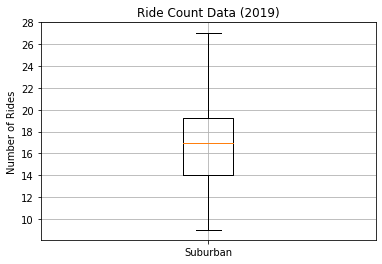

In [83]:
# Create a box and whisker plot for the suburban cities ride count.
x_labels=["Suburban"]
fig, ax=plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,30,step=2.0))
ax.grid()
plt.show()

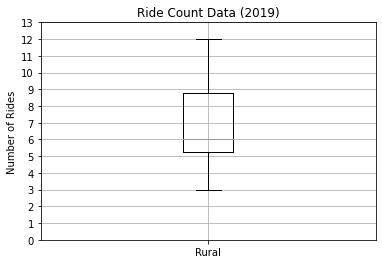

In [84]:
# Create a box and whisker plot for the rural cities ride count.
x_labels=["Rural"]
fig, ax=plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel("Number of Ridescv")
ax.set_yticks(np.arange(0,14,step=1.0))
ax.grid()
plt.show()

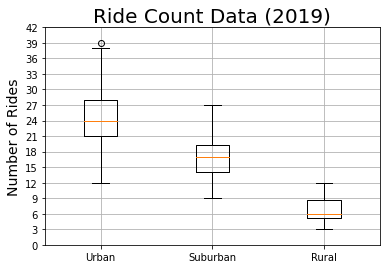

In [92]:
# Create a box and whisker plot for all the city type ride count
x_labels=["Urban","Suburban","Rural"]
ride_count_data=[urban_ride_count,suburban_ride_count,rural_ride_count]
fig, ax=plt.subplots()
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_yticks(np.arange(0,45,step=3.0))
ax.grid()
# Save the figure
plt.savefig("analysis/fig2.png")
plt.show()

In [86]:
# Get the city that matches 39
urban_city_outlier=urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


In [87]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [88]:
suburban_fares.describe()

count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [89]:
rural_fares.describe()

count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

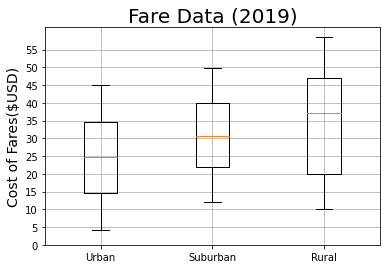

In [97]:
# Create a box and whisker plot for all the city type fare data
x_labels=["Urban","Suburban","Rural"]
fare_data=[urban_fares,suburban_fares,rural_fares]
fig, ax=plt.subplots()
ax.boxplot(fare_data, labels=x_labels)
ax.set_title('Fare Data (2019)', fontsize=20)
ax.set_ylabel("Cost of Fares($USD)", fontsize=14)
ax.set_yticks(np.arange(0,60,step=5.0))
ax.grid()
# Save the figure
plt.savefig("analysis/fig3.png")
plt.show()

In [99]:
urban_drivers.describe()

count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [100]:
suburban_drivers.describe()

count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [101]:
rural_drivers.describe()

count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

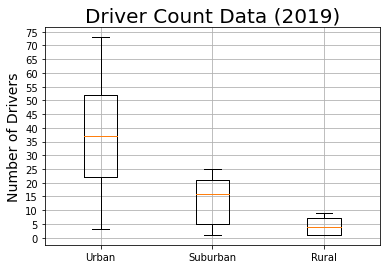

In [109]:
# Create a box and whisker plot for all the city type drivers data
x_labels=["Urban","Suburban","Rural"]
driver_count_data=[urban_drivers,suburban_drivers,rural_drivers]
fig, ax=plt.subplots()
ax.boxplot(driver_count_data, labels=x_labels)
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel("Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0,76,step=5.0))
ax.grid()
# Save the figure
plt.savefig("analysis/fig4.png")
plt.show()

In [110]:
# pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [123]:
# fares by city type
sum_fares_by_type=pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [124]:
# sum of all the fares
total_fares=pyber_data_df["fare"].sum()
total_fares

63538.64

In [126]:
type_percents = sum_fares_by_type/total_fares * 100
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [140]:
# percentage of city fares
total_city_fares = pyber_data_df.groupby(["type"]).sum()["fare"]/pyber_data_df["fare"].sum() * 100
total_city_fares

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

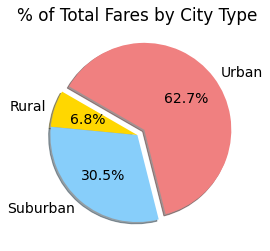

In [152]:
# Build the percentage of fares by city type pie chart.
plt.pie(total_city_fares, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150
       )
plt.title("% of Total Fares by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/fig5.png")
plt.show()

In [153]:
# pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [157]:
# percentage of city rides
total_city_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]/pyber_data_df["ride_id"].count() * 100
total_city_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

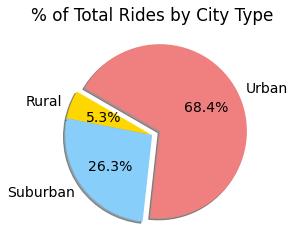

In [161]:
# Build the percentage of rides by city type pie chart.
plt.pie(total_city_rides, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.1],
        autopct='%1.1f%%',
        shadow=True, startangle=150
       )
plt.title("% of Total Rides by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/fig6.png")
plt.show()

In [172]:
# city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [173]:
# percentage of city drivers
total_city_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]/city_data_df["driver_count"].sum() * 100
total_city_drivers

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

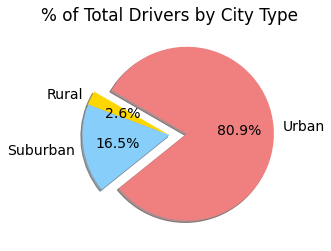

In [174]:
# Build the percentage of drivers by city type pie chart.
plt.pie(total_city_drivers, 
        labels=["Rural","Suburban","Urban"],
        colors=["gold","lightskyblue","lightcoral"],
        explode=[0,0,0.2],
        autopct='%1.1f%%',
        shadow=True, startangle=150
       )
plt.title("% of Total Drivers by City Type")
mpl.rcParams["font.size"]=14
plt.savefig("analysis/fig7.png")
plt.show()

In [ ]:
ride_sharing_data= pd.DataFrame[
    "Drivers"
]